# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

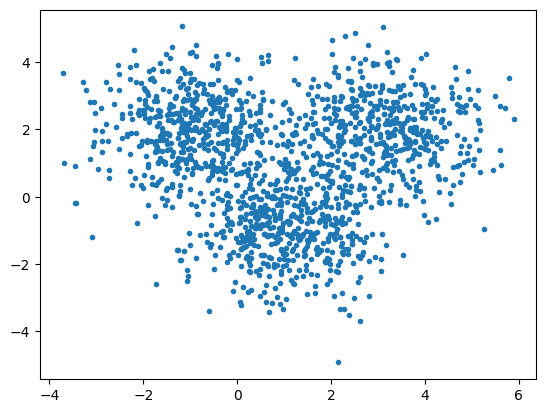

In [4]:
# seed = 101로 해서 어떤 알고리즘에 따라 난수를 생성 -> 항상 같은 데이터를 생성가능
np.random.seed(101)
# 3개의 centroid 점을 줌 : center 포지션을 넓게 벌리기 위한 임의의 점
centroidLocation = [[3,2], [1,-1],[-1,2]]
# 비지도 학습을 위해 y 자리는 _ 를 사용해, 위치만 잡음 
X, _ = make_blobs(n_samples=1500, centers=centroidLocation)
# 데이터 분포 시각화
plt.scatter(X[:,0], X[:,1], marker='.')

In [5]:
# 데이터 shape
X.shape

(1500, 2)

In [6]:
from sklearn.cluster import KMeans
# 모델 구성
nclusters = 3
k_means = KMeans(n_clusters=nclusters)

In [7]:
# 학습
k_means.fit(X)

KMeans(n_clusters=3)

In [ ]:
# 레이블 : 0,1,2 중 어느걸로 속하는지
k_means.labels_
# 3개의 샘플 위치 : [3,2], [1,-1],[-1,2] => [1.04677914, -0.97038147], [3.14135743, 2.01895659], [-0.97958037, 2.04290344]
centers = k_means.cluster_centers_

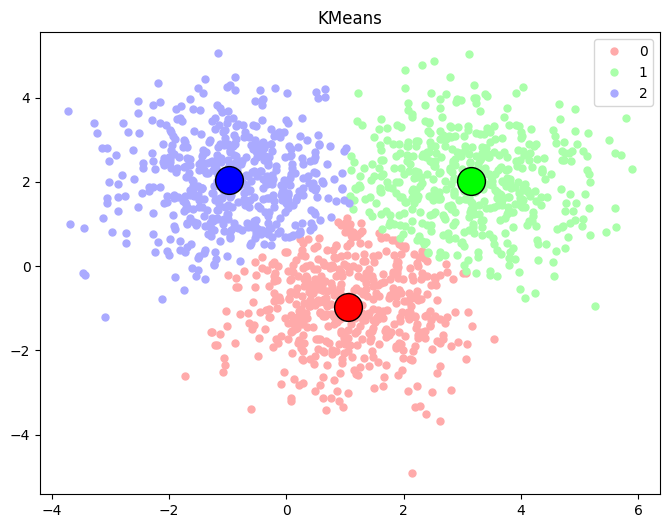

In [9]:
# 클러스터링된 결과 시각화

from matplotlib.colors import ListedColormap

colors_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
colors_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(8,6))

for i in range(nclusters):
    members = k_means.labels_ == i
    plt.plot(X[members, 0], X[members, 1], '.', 
             color=colors_light(i), markersize=10, label=i)
    plt.plot(centers[i, 0], centers[i, 1], 'o', 
             color=colors_bold(i), markeredgecolor='k', markersize=20)

plt.title("KMeans")
plt.legend()

# DBSCAN

DBSCAN :

>eps : epsilon (radius)  
>min_sample : minimum samples within the radius

- outlier 가 있는 data points를 생성하고 DBSCAN 알고리즘이 outlier를 검출하는지 test

In [12]:
from sklearn.cluster import DBSCAN

# 이상치가 있는 데이터 포인트 생성
X1, _ = make_blobs(n_samples=500, centers=[[-3,-3]])
X2, _ = make_blobs(n_samples=500, centers=[[3,3]])
X3 = np.random.rand(500, 2) * 3 + 4
X4 = np.random.randn(10, 2) * 3  #outlier

X1.shape, X2.shape, X3.shape, X4.shape

((500, 2), (500, 2), (500, 2), (10, 2))

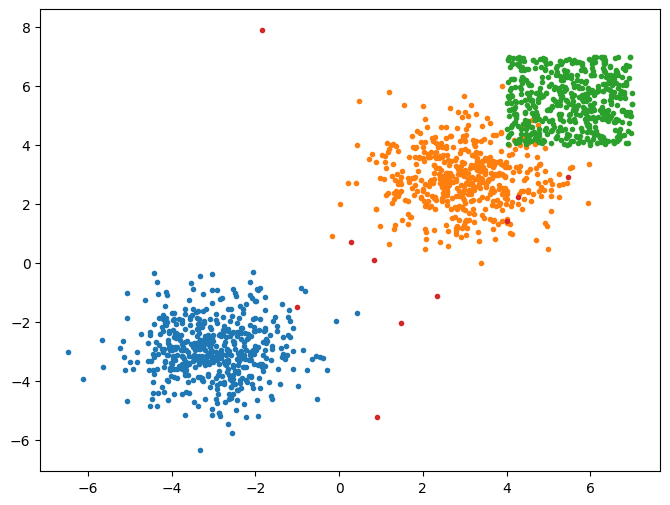

In [13]:
# 데이터 분포 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.scatter(X2[:, 0], X2[:, 1], marker='.')
plt.scatter(X3[:, 0], X3[:, 1], marker='.')
plt.scatter(X4[:, 0], X4[:, 1], marker='.')

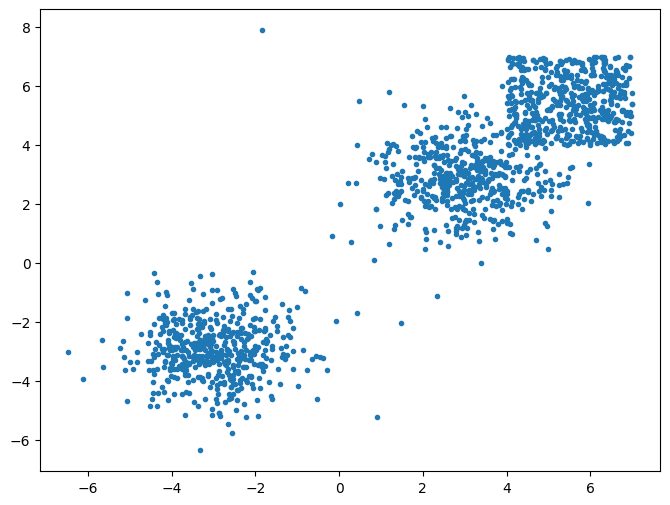

In [14]:
# 4개의 데이터를 하나로 합침
X = np.vstack([X1, X2, X3, X4])
X.shape # (1510, 2)
# 합친 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [15]:
from sklearn.cluster import DBSCAN
# 모델링
epsilon = 0.3 # 반경 radius
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

In [16]:
# 레이블 확인
labels = db.labels_ # [ 0  0 -1 ...  4 -1 -1]
unique_labels = set(labels) # {-1, 0, 1, 2, 3, 4, 5}  -1 : outlier

print(labels.shape) # (1510, )
print(db.core_sample_indices_.shape) # (1234, )
print(db.core_sample_indices_) # [   0    1    3 ... 1499 1505 1507]

(1510,)
(1230,)
[   4    5    8 ... 1498 1499 1509]


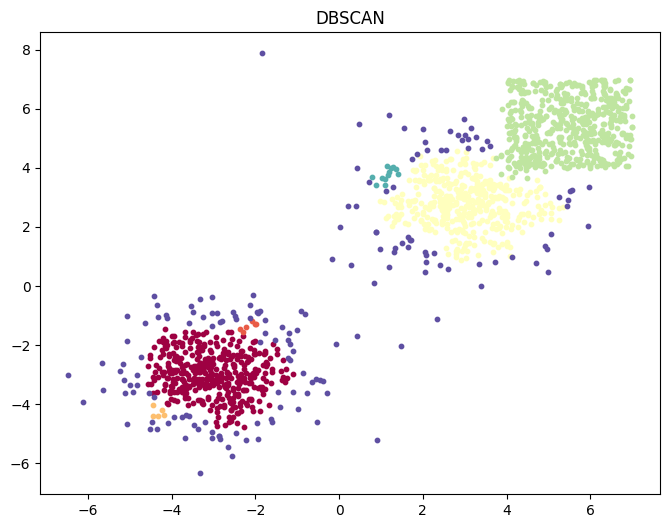

In [ ]:
# DBSCAN 시각화

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    members = (labels == k)
    plt.scatter(X[members, 0], X[members, 1], color=col, 
                marker='o', s=10)

plt.title('DBSCAN')
plt.show()

# PCA (Principal Component Analysis)

- PCA는 Karl Pearson이 1901 년에 발명한 통계 기법으로 직교 변환을 사용하여 변수 집합을 주성분이라고 하는 선형적으로 상관되지 않은 변수 집합으로 매핑.

- PCA는 원래 데이터세트의 공분산 행렬의 SVD(Singular Value Decomposition)를 기반으로 한다. 이러한 분해(decomposition)의 고유 벡터는 회전변환 행렬(rotation matrix)로 사용된다. 고유 벡터는 설명된 분산에 따라 내림차순으로 회전변환 행렬에 배열.

- PCA는 단순한 공간 변환, 차원 감소 및 스펙트럼 정보로부터의 혼합물 분리에 이르기까지 다양한 응용 분야에서 강력한 기술로 사용


- "ChurnData.csv"의 각 행은 고객을 나타내고 각 열은 고객의 속성 표시

- 데이터 세트에는 지난달에 탈회한 고객에 대한 정보가 포함 (Churn 1.0 - 탈회, 0.0 - 유지)

- 각 행은 고객을 나타내고 각 열은 고객의 속성 표시
- 지난달에 탈회한 고객에 대한 정보가 포함 (Churn 1.0 - 탈회, 0.0 - 유지)
- 28개의 피처를 차원 축소하여 해당 고객이 탈회할 것인지를 예측
- 2차원 상에 시각화할 수 없기 때문에 pca를 통해 2차원으로 축소하는 것

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
churn_df = pd.read_csv("datasets/ChurnData.csv")
# 데이터 확인
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
# 칼럼 확인
churn_df.columns


Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
columns = churn_df.columns[:-1]

# shape 확인
churn_df.shape

(200, 28)

In [7]:
X = churn_df.loc[:, columns]
y = churn_df['churn']

In [8]:
# train / test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# 최종 데이터 shape 확인
print(X_train.shape) # (160, 27)
print(X_test.shape) # (40, 27)

(160, 27)
(40, 27)


In [10]:
# 스케일링
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA 적용 전 Logistic Regression

- PCA 적용 후의 결과와 비교 목적

In [11]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
# predict test set
y_pred = clf.predict(X_test)

In [14]:
# accuracy score
accuracy_score(y_test, y_pred)

0.775

### PCA 적용

- 27 개의 feature 를 2 개로 차원 축소  


- components_
    - array, shape (n_components, n_features)
    - n_feature dimension 공간에서의 주성분 축  
    - data 의 분산을 최대로 보존하는 방향
    - explained_variance_ 에 순서대로 정렬되어 있음
    
- explained_variance_  
    - shape (n_components,)  
    - 선택한 각 구성 요소에서 설명하는 분산의 양  
    
- explained_variance_ratio_   
    - shape (n_components,)
    - 선택한 각 구성 요소가 설명하는 분산의 백분율입니다.

In [17]:
# Apply kernel PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2개 component로 차원 축소

X_train_pca = pca.fit_transform(X_train) # pca 함수가 다차원 공간의 공분산(분산이 최대화 되는 축)을 찾음 -> 두개의 매트릭스로력
X_test_pca = pca.transform(X_test) # 동일한 분포를 가진것으로 해야하므로 fit_transform 이 아닌 transform만

In [18]:
print("차원 축소된 X_train :", X_train_pca.shape) # (160, 2)
print("차원 축소된 X_test :", X_test_pca.shape) # (40, 2)
print(pca.components_.shape) # (2,27)

차원 축소된 X_train : (160, 2)
차원 축소된 X_test : (40, 2)
(2, 27)


In [19]:
print("첫번째 주성분(고유벡터) :")
print(pca.components_[0])
print("두번째 주성분(고유벡터) :")
print(pca.components_[1])
print()
print('설명된 분산(고유값)의 비율: {}, 두 성분의 합: {:.2f}'
      .format(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_)))

첫번째 주성분(고유벡터) :
[0.18870382 0.09407626 0.06999421 0.02405283 0.08039882 0.10532452
 0.0913006  0.22012759 0.24022929 0.17035807 0.26783154 0.16389682
 0.25017627 0.28326203 0.17638143 0.27435707 0.22993114 0.24062665
 0.26112415 0.0747603  0.22729268 0.21587761 0.06959358 0.17457864
 0.17900112 0.07082588 0.29324012]
두번째 주성분(고유벡터) :
[ 0.2917276   0.18411246  0.24507417  0.04409899 -0.16349343  0.2142686
 -0.23252316  0.07599265 -0.23520159  0.29224485 -0.06742566 -0.24108039
  0.12944092 -0.20861384  0.29806582  0.04425842  0.22376079 -0.18866967
 -0.17737835 -0.24830636 -0.0674659  -0.05215805 -0.21541163  0.28738933
  0.03136523  0.07488121 -0.10196478]

설명된 분산(고유값)의 비율: [0.25193472 0.21764464], 두 성분의 합: 0.47


In [20]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [21]:
# predict test set
y_pred = clf.predict(X_test_pca)
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [22]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 0.725 -> 차원 축소 후에도 별 차이가 없음 : 정보 손실이 거의 없

0.725

## 차원 축소된 churn data 시각화
- 27 개의 feature 가 2 개의 PCA 로 차원 축소 되었으므로 평면상의 시각화 가능

In [23]:
X_train_pca.shape

(160, 2)

→ X_train_pca ⇒ X1, X2 축으로 시각화

→ y_train : 0,1을 색으로 구분 (0 : 탈회 X, 1 : 탈회 O)

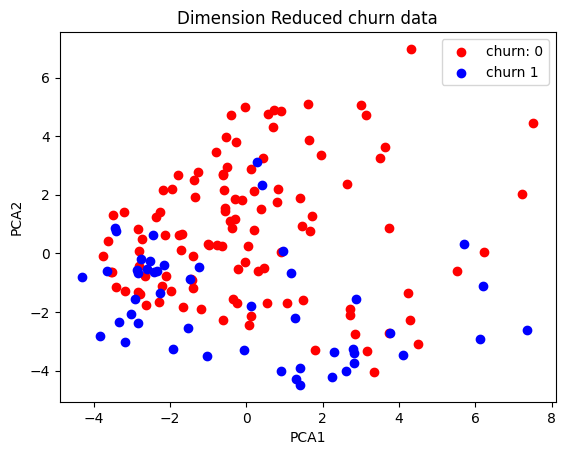

In [24]:
X1, X2 = X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1]
plt.scatter(X1, X2, color='r', label="churn: 0")

X1, X2 = X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1]
plt.scatter(X1, X2, color='b', label="churn 1")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced churn data');
plt.show()